In [1]:
from pyplotdesigner.core.design import Design
from pyplotdesigner.core.models import SetValueConstraint
from pyplotdesigner.core.design_loader import make_figure_from_design

In [2]:
design = Design()

design.set_viewport(figure_width=2.7, figure_height=3.8)

plot1 = design.add_element(id='plot1', type='axis', x=0.4, y=0.35, width=1, height=1)
plot2 = design.add_element(id='plot2', type='axis', x=0, y=0, width=1, height=1)
plot3 = design.add_element(id='plot3', type='axis', x=0, y=0, width=1, height=1)

aspect_ratio = design.add_constant(id='aspect_ratio', value=2.)
h_spacing = design.add_constant(id='h_spacing', value=0.1)

design.add_constraint(SetValueConstraint(target=plot1.height, source=plot1.width, multiply=aspect_ratio.value))
design.add_constraint(SetValueConstraint(target=plot2.y, source=plot1.y))
design.add_constraint(SetValueConstraint(target=plot2.height, source=plot1.height))
design.add_constraint(SetValueConstraint(target=plot2.x, source=plot1.right, add_after=h_spacing.value))
design.add_constraint(SetValueConstraint(target=plot3.x, source=plot1.x))
design.add_constraint(SetValueConstraint(target=plot3.y, source=plot2.top, add_after=0.2))
design.add_constraint(SetValueConstraint(target=plot3.width, source=plot3.x, multiply=-1., add_after=plot2.right))

design.solve()

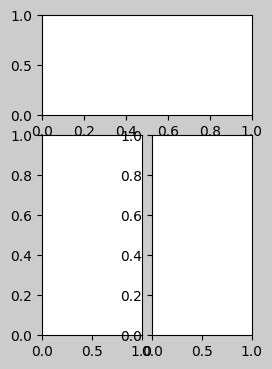

In [3]:
fig, axes = make_figure_from_design(design, facecolor='#cccccc')